In [18]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np




In [19]:
df = pd.read_csv('../data/weather.csv')  # adjust path if needed
print(df.shape)  #number of rows and columns
print(df.head()) #first 5 rows
print(df.info()) #summary of the dataset: column names, data types, non-null counts (to see missing data)
print(df.describe())  #basic statistical summaries for numeric columns: count, mean, std, min, max, quartiles

(145460, 23)
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0    

In [ ]:
# Average afternoon temp is 21.7°C
# Most temps are between 16.6°C and 26.4°C (middle 50%)
# Extreme temps range from -5.4°C to 46.7°C

In [3]:
print(df.isnull().sum())   #how many missing values are in each column.

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [ ]:
#goot features to use (less missing values)
# Feature	Missing values
# Humidity3pm	4,507
# Pressure3pm	15,028
# Temp9am	1,767
# WindSpeed3pm	3,062

In [20]:
# Columns to keep
columns = ['Temp3pm', 'Temp9am', 'Humidity3pm', 'Humidity9am', 'WindSpeed3pm', 'WindSpeed9am']

# Keep only selected columns and drop rows with missing values
df_cleaned = df[columns].dropna()

# Show the number of rows left
print("Cleaned dataset shape:", df_cleaned.shape)

# Save cleaned data to a new CSV file
df_cleaned.to_csv('../data/weather_cleaned.csv', index=False)

print("Cleaned data saved as weather_cleaned.csv")

Cleaned dataset shape: (139211, 6)
Cleaned data saved as weather_cleaned.csv


In [22]:
df_cleaned = pd.read_csv('../data/weather_cleaned.csv')

In [23]:
df_cleaned.info()
print("\nMissing values per column:\n", df_cleaned.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139211 entries, 0 to 139210
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Temp3pm       139211 non-null  float64
 1   Temp9am       139211 non-null  float64
 2   Humidity3pm   139211 non-null  float64
 3   Humidity9am   139211 non-null  float64
 4   WindSpeed3pm  139211 non-null  float64
 5   WindSpeed9am  139211 non-null  float64
dtypes: float64(6)
memory usage: 6.4 MB

Missing values per column:
 Temp3pm         0
Temp9am         0
Humidity3pm     0
Humidity9am     0
WindSpeed3pm    0
WindSpeed9am    0
dtype: int64


In [25]:
df_cleaned.describe()

,Temp3pm,Temp9am,Humidity3pm,Humidity9am,WindSpeed3pm,WindSpeed9am
count,139211.000000,139211.000000,139211.000000,139211.000000,139211.000000,139211.000000
mean,21.710755,16.950914,51.469834,68.832305,18.685851,14.075914
std,6.910927,6.462720,20.763554,19.072169,8.818906,8.874151
min,-5.400000,-7.200000,0.000000,0.000000,0.000000,0.000000
25%,16.600000,12.300000,37.000000,57.000000,13.000000,7.000000
50%,21.100000,16.700000,52.000000,70.000000,19.000000,13.000000
75%,26.400000,21.500000,66.000000,83.000000,24.000000,19.000000
max,46.700000,40.200000,100.000000,100.000000,87.000000,87.000000


In [ ]:
# On average → warm afternoons, cooler mornings
# 
# Humidity drops through the day
# 
# Wind tends to pick up by afternoon

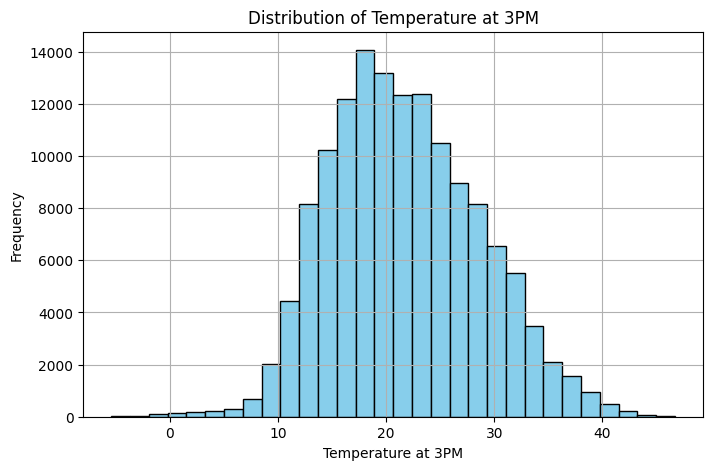

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df_cleaned['Temp3pm'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Temperature at 3PM')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature at 3PM')
plt.show()


In [ ]:
# The distribution is roughly bell-shaped (normal-ish) → centered around 18–22°C
# Most temperatures fall between 10°C and 30°C
# Fewer very cold (<5°C) or very hot (>35°C) days
# A small tail towards higher temps → skewed a little to the right (hot days)
# The temperature at 3 PM behaves mostly like a normal distribution → good for linear regression.

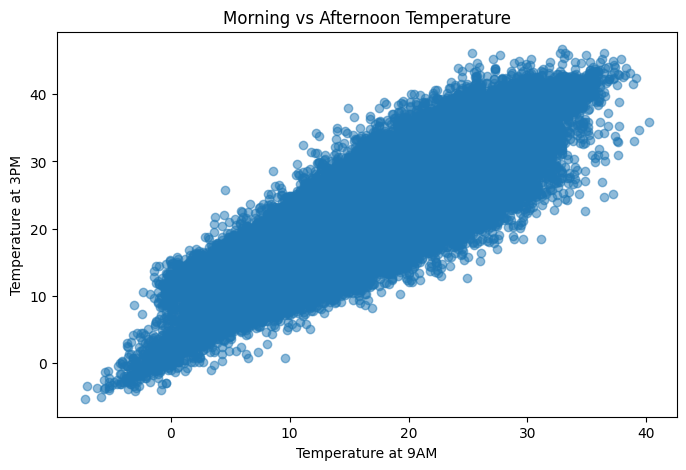

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(df_cleaned['Temp9am'], df_cleaned['Temp3pm'], alpha=0.5)
plt.xlabel('Temperature at 9AM')
plt.ylabel('Temperature at 3PM')
plt.title('Morning vs Afternoon Temperature')
plt.show()


In [ ]:
# strong positive linear relationship between Temp9am and Temp3pm
# dots spread wider above 30°C → more variability on hot days)
# warmer mornings → warmer afternoons

#When it’s very hot in the morning, other factors (humidity, clouds, storms, heatwaves) start influencing afternoon temp more → less predictability.

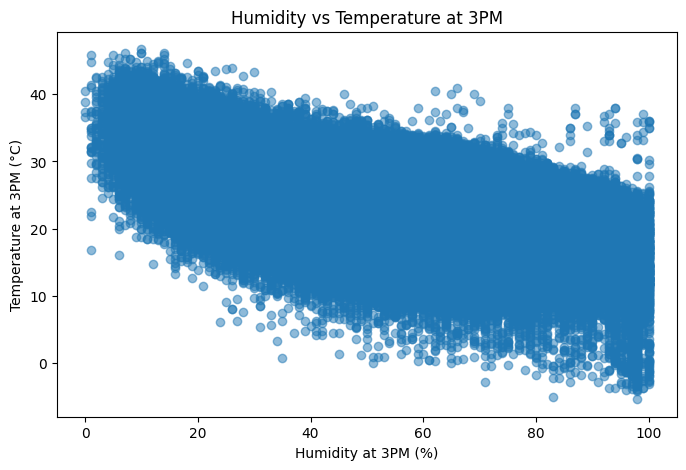

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(df_cleaned['Humidity3pm'], df_cleaned['Temp3pm'], alpha=0.5)
plt.xlabel('Humidity at 3PM (%)')
plt.ylabel('Temperature at 3PM (°C)')
plt.title('Humidity vs Temperature at 3PM')
plt.show()


In [ ]:
# humidity increases, temperature tends to decrease.
# Low humidity → high temperature (hot dry days)
# High humidity → lower temperature (likely cloudy/rainy days)

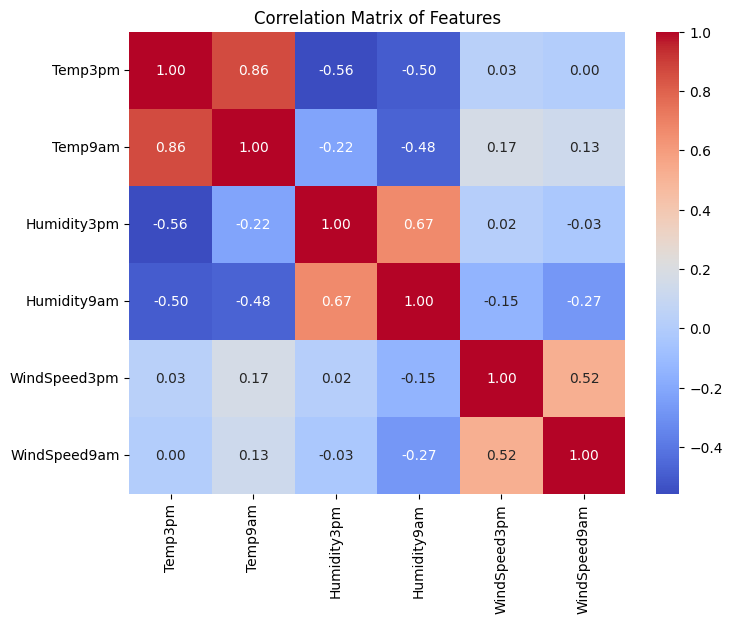

In [29]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
# Temp9am is the strongest predictor of Temp3pm
# Humidity3pm and Humidity9am weacker predictors

# Temp9am → strongest predictor
# Humidity3pm → next best
# Humidity9am → weaker but still informative

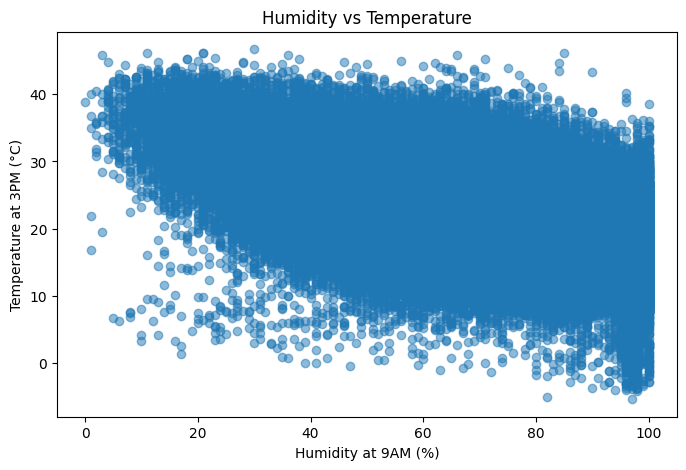

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(df_cleaned['Humidity9am'], df_cleaned['Temp3pm'], alpha=0.5)
plt.xlabel('Humidity at 9AM (%)')
plt.ylabel('Temperature at 3PM (°C)')
plt.title('Humidity vs Temperature')
plt.show()

In [ ]:
# weaker than Humidity3pm

In [ ]:


# If morning temp is X, humidity is Y, wind is Z… then afternoon temp is likely W.

# linear regression model, which finds the “best fit line” (or plane) that relates inputs → output.

# Temp3pm ≈ b0 + b1*Temp9am + b2*Humidity3pm + b3*Humidity9am + b4*WindSpeed3pm + b5*WindSpeed9am
# where b0, b1, b2... are the coefficients learned by the model.


In [31]:
from sklearn.model_selection import train_test_split   #split your dataset into a training set and a test set.

# Features (X) and target (y)
X = df_cleaned[['Temp9am', 'Humidity3pm', 'Humidity9am', 'WindSpeed3pm', 'WindSpeed9am']]  #features (columns used to predict)
y = df_cleaned['Temp3pm']   #target variable (what I want to predict)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #20% of the data will be used for testing, and 80% for training
# random_state=42: ensures reproducibility (the same split every time you run it); fixed seed for the random number generator.


In [32]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (111368, 5)
y_train shape: (111368,)
X_test shape: (27843, 5)
y_test shape: (27843,)


In [33]:
print(X_train.head())  #first 5 are x  (training var)
print(y_train.head()) #bext 5 are y  (target var = temperature in degrees at 3pm)


        Temp9am  Humidity3pm  Humidity9am  WindSpeed3pm  WindSpeed9am
61950       6.0         68.0         74.0          39.0          31.0
122584     16.0         53.0         54.0          24.0          20.0
45622       8.0         45.0         83.0          11.0           7.0
56197      14.7         32.0         58.0          19.0          17.0
81375      25.3         71.0         78.0           9.0           2.0
61950     10.0
122584    18.6
45622     15.9
56197     22.4
81375     25.3
Name: Temp3pm, dtype: float64


In [34]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Fit (train) the model using the training data (learns how training data is related to temp3pm)
model.fit(X_train, y_train)


LinearRegression()

In [35]:
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1...b5):", model.coef_)


Intercept (b0): 9.594117100971205
Coefficients (b1...b5): [ 0.93986947 -0.17875181  0.09523273 -0.0448524  -0.02334483]


In [ ]:
# Temp3pm ≈ 9.59 
#          + 0.94 * Temp9am             Temp at 9AM has the strongest effect → warmer mornings → warmer afternoons.
#          - 0.18 * Humidity3pm         Humidity at 3PM lowers afternoon temperature
#          + 0.10 * Humidity9am 
#          - 0.045 * WindSpeed3pm 
#          - 0.023 * WindSpeed9am

# Each coefficient shows how much Temp3pm changes when that feature increases by 1 unit, holding others constant.

In [ ]:
# ----------------MAKE PREDICTIONS------------------------

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [37]:
print("First 10 predictions:", y_pred[:10])


First 10 predictions: [18.39519408 22.4006883  27.72118914 12.18703853 25.61960688 27.50172807
 12.27379511 23.07801989 25.21432181 28.24423322]


In [38]:
print("Actual values:", y_test[:10].values)


Actual values: [16.6 25.8 26.6 15.5 24.3 30.4 12.7 20.  24.3 33.3]


In [39]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2:.3f}")    #R-squared tells you how much of the variability in Temp3pm your model explains;  Closer to 1 = better =>model fits data well =92% ACCURACY
print(f"RMSE: {rmse:.2f}")   #RMSE = Root Mean Squared Error → average prediction error, in the same units as Temp3pm (°C)


R-squared: 0.924
RMSE: 1.91


In [ ]:
# ️ model can predict afternoon temperature with very high accuracy (~92%)
# ️ Its predictions are on average within ±2°C of the actual value

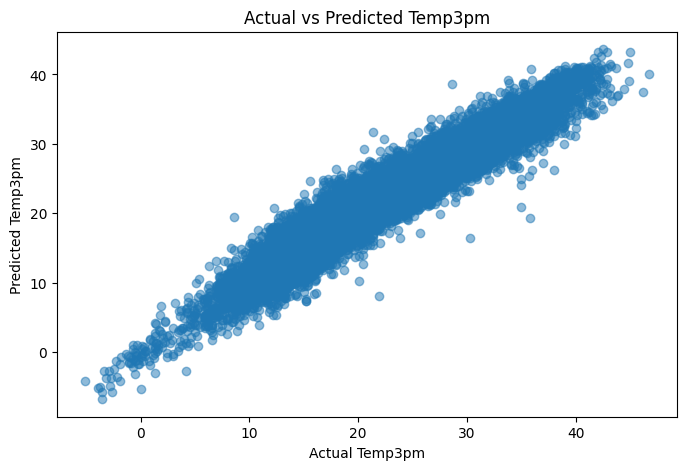

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Temp3pm')
plt.ylabel('Predicted Temp3pm')
plt.title('Actual vs Predicted Temp3pm')
plt.show()


In [ ]:
#Each dot = one prediction.
# Most dots are very close to the diagonal 
# Some small spread (natural noise in data) → no big outliers or strange patterns.

#=> very close guesses to real 3pm temperatures

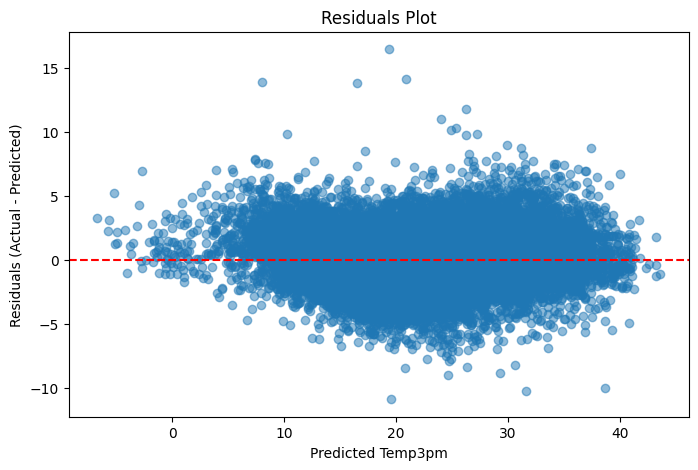

In [41]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Temp3pm')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.show()


In [ ]:
# X-axis → Predicted Temp3pm
# Y-axis → Residuals (Actual - Predicted)

# Each dot = one prediction.
# no big bias, no clear pattern, errors are random

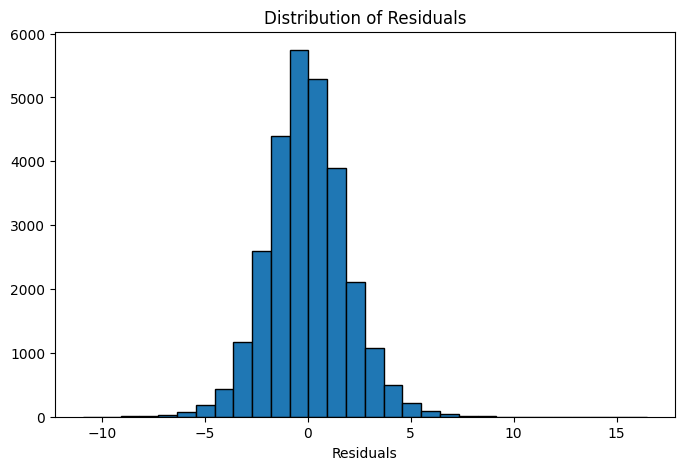

In [42]:
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


In [ ]:
# most predictions are within a few degrees of the actual value.